## Example 2

In [1]:
from math import ceil
import pystare as ps

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import cartopy.crs as ccrs

import numpy as np

In [2]:
def shiftarg_lon(lon):
    "If lon is outside +/-180, then correct back."
    if(lon>180):
        return ((lon + 180.0) % 360.0)-180.0
    else:
        return lon

def triangulate1(lats,lons):
    "Prepare data for tri.Triangulate."
    print('triangulating1...')
    intmat=[]
    npts=int(len(lats)/3)
    k=0
    for i in range(npts):
        intmat.append([k,k+1,k+2])
        k=k+3
    for i in range(len(lons)):
        lons[i] = shiftarg_lon(lons[i])
    print('triangulating1 done.')      
    return lons,lats,intmat

def plot1(lon,lat,lons,lats,triang,c0='r',c1='b',transf=None,lw=1):
    if(lon is not None):
        x=np.zeros([lon.size+1],dtype=np.double);x[:-1]=lon[:];x[-1]=lon[0]
        y=np.zeros([lat.size+1],dtype=np.double); y[:-1]=lat[:]; y[-1]=lat[0]
        ax.plot(x,y,True,transform=transf,c=c0)
    plt.triplot(triang,c1+'-',transform=transf,lw=lw,markersize=3)
    plt.scatter(lons,lats,s=10,c=c1,transform=ccrs.PlateCarree())
    return

def make_hull(lat0,lon0,resolution0):
    hull0 = ps.to_hull_range_from_latlon(lat0,lon0,resolution0)
    lath0,lonh0,lathc0,lonhc0 = ps.to_vertices_latlon(hull0)
    lons0,lats0,intmat0 = ps.triangulate(lath0,lonh0)
    triang0 = tri.Triangulation(lons0,lats0,intmat0)
    return lats0,lons0,triang0,hull0

hull0:  204
hull1:  256
intersected:  44
graphics-0
graphics-1
graphics-2


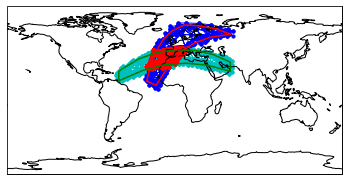

In [3]:
resolution = 5
# resolution = 4

resolution0 = resolution
lat0 = np.array([ 10, 5, 60,70], dtype=np.double)
lon0 = np.array([-30,-20,60,10], dtype=np.double)
lats0,lons0,triang0,hull0 = make_hull(lat0,lon0,resolution0)
print('hull0: ',len(hull0))

resolution1 = resolution
lat1 = np.array([10,  20, 30, 20 ], dtype=np.double)
lon1 = np.array([-60, 60, 60, -60], dtype=np.double)
lats1,lons1,triang1,hull1 = make_hull(lat1,lon1,resolution1)
print('hull1: ',len(hull1))

if True:
    intersected = np.full([1000],-1,dtype=np.int64)
    # intersected = ps.intersect(hull0,hull1,multiresolution=False)
    intersected = ps.intersection(hull0, hull1, multi_resolution=True)
    # intersected = ps.intersect(hull0,hull1,multiresolution=True)
    # print('hull0: ',[hex(i) for i in hull0])
    # print('hull1: ',[hex(i) for i in hull1])
    # ps._intersect_multiresolution(hull0,hull1,intersected)
    # print('intersected: ',len(intersected))
    # print('np.min:      ',np.amin(intersected))
    # print('intersected: ',[hex(i) for i in intersected])
    # The following are for _intersect_multiresolution's results
    # endarg = np.argmax(intersected < 0)
    # intersected = intersected[:endarg]
    # intersected = ps.intersect(hull0,hull1)
    print('intersected: ',len(intersected))
    lati,loni,latci,lonci = ps.to_vertices_latlon(intersected)
    lonsi,latsi,intmati = ps.triangulate(lati,loni)
    triangi = tri.Triangulation(lonsi,latsi,intmati)


# Set up the projection and transformation
proj = ccrs.PlateCarree()
# proj = ccrs.Robinson()
# proj = ccrs.Geodesic()
# proj   = ccrs.Mollweide()
transf = ccrs.Geodetic()
# transf = ccrs.PlateCarree()
plt.figure()
plt.subplot(projection=proj,transform=transf)
ax = plt.axes(projection=proj,transform=transf)
ax.set_global()
ax.coastlines()
print('graphics-0')
plot1(lon0,lat0,lons0,lats0,triang0,c0='r',c1='b',transf=transf)
print('graphics-1')
plot1(lon1,lat1,lons1,lats1,triang1,c0='g',c1='c',transf=transf)
print('graphics-2')
plot1(None,None,lonsi,latsi,triangi,c0='y',c1='r',transf=transf,lw=4)
plt.show()